In [1]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns

%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [2]:
mice["FEDXA01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

In [3]:
IPIs = mice["FEDXA01"]["interpellet_intervals_pr"]

In [4]:
from scipy import stats

In [5]:
kernel = stats.gaussian_kde(IPIs)

In [6]:
kernel

In [7]:
x = np.linspace(0.0001, 10, 10000)

In [8]:
len(x)

10000

1385


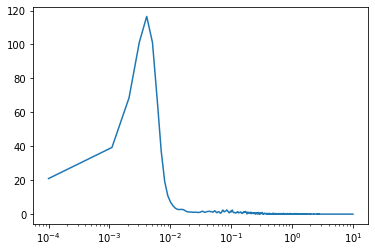

In [17]:
IPIs = mice["FEDXA02"]["interpellet_intervals_pr"]
print(len(IPIs))

kernel = stats.gaussian_kde(IPIs, bw_method=0.005)
x = np.linspace(0.0001, 10, 10000)

f, ax = plt.subplots()
ax.plot(x, kernel(x))
ax.set_xscale("log")

<AxesSubplot:ylabel='Count'>

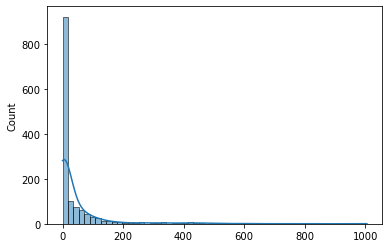

In [15]:


y = [ipi*360 for ipi in IPIs if ipi > 0]

div = 900/50
bins = [i*div for i in range(50)]

logx=False
if logx:
    y = [np.log10(val) for val in y]

f, ax = plt.subplots()
sns.histplot(y,bins=bins,label="yoyoyo",ax=ax,
                kde=True)

In [1]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns

%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [2]:
mice["FEDXA01"].keys()


dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'bodyweight', 'hoarding', 'grain_avg_pellets', 'pr_avg_pellets', 'nr_avg_pellets', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

In [3]:
def interpellet_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    """
    FED3 Viz: Plot a histogram of interpellet intervals for multiple devices.
    Parameters
    ----------
    FEDs : list of FED3_File objects
        FED3 files (loaded by load.FED3_File)
    kde : bool
        Whether or not to include kernel density estimation, which plots
        probability density (rather than count) and includes a fit line (see
        seaborn.distplot)
    **kwargs :
        ax : matplotlib.axes.Axes
            Axes to plot on, a new Figure and Axes are
            created if not passed
        date_filter : array
            A two-element array of datetimes (start, end) used to filter
            the data
        **kwargs also allows FED3 Viz to pass all settings to all functions.
    Returns
    -------
    fig : matplotlib.figure.Figure
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = tp.flatten_list(group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    linestyle=linestyle)

    ax.set_ylabel('Density Estimation')
    ax.set_xlabel('Minutes between pellets')

    ax.set_xticks(range(-2,5))
    ax.set_xticklabels([10**num for num in range(-2,5)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
['green', 'red']
['green', 'red']


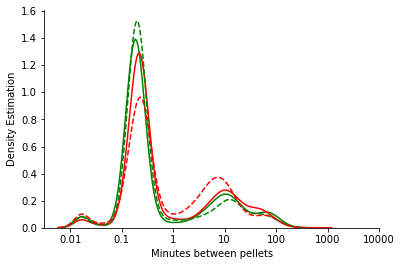

In [4]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

IPIs_m_nrpr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], nrpr_male_selector)
IPIs_m_nrpr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], nrpr_male_selector)

IPIs_m_prnr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], prnr_male_selector)
IPIs_m_prnr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], prnr_male_selector)

f, ax = plt.subplots()

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           linestyle="-",
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["green", "red"],
                           linestyle="--",
                           ax=ax)

['green', 'red']
['xkcd:kelly green', 'pink']


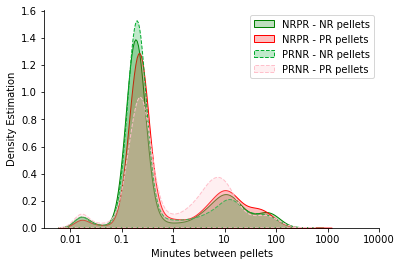

In [5]:
f, ax = plt.subplots()

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           labels=["NRPR - NR pellets", "NRPR - PR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["xkcd:kelly green", "pink"],
                           labels=["PRNR - NR pellets", "PRNR - PR pellets"],
                           linestyle="--",
                           fill=True,
                           ax=ax)

ax.legend()